# **Installation**

In [1]:
pip install pennylane==0.29

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 12.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 kB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.6/13.6 MB 66.7 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of pennylane-lightning to determine which version is compatible with other requirements. This could take a while.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.6/16.6 MB 25.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.6/16.6 MB 9.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 102.3 MB/s eta 0:00:00


In [2]:
pip install pennylane-sf

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 22.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.0/48.0 kB 4.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.6/108.6 kB 10.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.2/117.2 kB 12.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.5/103.5 kB 13.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.3/88.3 kB 12.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for antlr4-python3-runtime: filename=antlr4_python3_runtime-4.9.2-py3-none-any.whl size=144548 sha256=4c78f3946af940b76d3fa1ac1ef325a55470672b973e10227bf625a71d045ccf
  Stored in directory: /root/.cache/pip/wheels/af/c8/1f/dd6d90c5974896e85709e017986a6f72fcf32343bea042bc03
  Created wheel for thewalrus: filename=thewalrus-0.20.0-py3-none-any.whl size=91853 sha256=9c2eba

# **Libs**

In [3]:
import pennylane as qml
from pennylane import numpy as pnp


# import qiskit

# import tensorflow as tf
# from tensorflow import keras
# from tensorflow.keras import layers
# from keras.utils import to_categorical

import numpy as np
from numpy.random import sample
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import pandas as pd

import sklearn
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.datasets import load_iris
from sklearn.kernel_ridge import KernelRidge

from sklearn.metrics import mean_squared_error,r2_score
from sklearn.linear_model import BayesianRidge
# import warnings
# warnings.filterwarnings("ignore")

# tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)

In [4]:
from pennylane.ops import RX, RY, RZ
from pennylane.operation import Operation, AnyWires
ROT = {"X": RX, "Y": RY, "Z": RZ}


class AngleEmbedding(Operation):
    r"""
    Encodes :math:`N` features into the rotation angles of :math:`n` qubits, where :math:`N \leq n`.

    The rotations can be chosen as either :class:`~pennylane.ops.RX`, :class:`~pennylane.ops.RY`
    or :class:`~pennylane.ops.RZ` gates, as defined by the ``rotation`` parameter:

    * ``rotation='X'`` uses the features as angles of RX rotations

    * ``rotation='Y'`` uses the features as angles of RY rotations

    * ``rotation='Z'`` uses the features as angles of RZ rotations

    The length of ``features`` has to be smaller or equal to the number of qubits. If there are fewer entries in
    ``features`` than rotations, the circuit does not apply the remaining rotation gates.

    Args:
        features (tensor_like): input tensor of shape ``(N,)``, where N is the number of input features to embed,
            with :math:`N\leq n`
        wires (Any or Iterable[Any]): wires that the template acts on
        rotation (str): type of rotations used
        id (str): custom label given to an operator instance,
            can be useful for some applications where the instance has to be identified.

    Example:

        Angle embedding encodes the features by using the specified rotation operation.

        .. code-block:: python

            dev = qml.device('default.qubit', wires=3)

            @qml.qnode(dev)
            def circuit(feature_vector):
                qml.AngleEmbedding(features=feature_vector, wires=range(3), rotation='Z')
                qml.Hadamard(0)
                return qml.probs(wires=range(3))

            X = [1,2,3]

        Here, we have also used rotation angles :class:`RZ`. If not specified, :class:`RX` is used as default.
        The resulting circuit is:

        >>> print(qml.draw(circuit, expansion_strategy="device")(X))
        0: ──RZ(1.00)──H─┤ ╭Probs
        1: ──RZ(2.00)────┤ ├Probs
        2: ──RZ(3.00)────┤ ╰Probs

    """

    num_wires = AnyWires
    grad_method = None

    def _flatten(self):
        hyperparameters = (("rotation", self._rotation),)
        return self.data, (self.wires, hyperparameters)

    def __repr__(self):
        return f"AngleEmbedding({self.data[0]}, wires={self.wires.tolist()}, rotation={self._rotation})"

    def __init__(self, features, wires, rotation="X", id=None):
        if rotation not in ROT:
            raise ValueError(f"Rotation option {rotation} not recognized.")

        shape = qml.math.shape(features)[-1:]
        # print(shape,shape[0])
        n_features = shape[0]
        if n_features > len(wires):
            raise ValueError(
                f"Features must be of length {len(wires)} or less; got length {n_features}."
            )

        self._rotation = rotation
        self._hyperparameters = {"rotation": ROT[rotation]}

        wires = wires[:n_features]
        super().__init__(features, wires=wires, id=id)

    @property
    def num_params(self):
        return 1

    @property
    def ndim_params(self):
        return (1,)

    @staticmethod
    def compute_decomposition(features, wires, rotation):  # pylint: disable=arguments-differ
        r"""Representation of the operator as a product of other operators.

        .. math:: O = O_1 O_2 \dots O_n.



        .. seealso:: :meth:`~.AngleEmbedding.decomposition`.

        Args:
            features (tensor_like): input tensor of dimension ``(len(wires),)``
            wires (Any or Iterable[Any]): wires that the operator acts on
            rotation (.Operator): rotation gate class

        Returns:
            list[.Operator]: decomposition of the operator

        **Example**

        >>> features = torch.tensor([1., 2.])
        >>> qml.AngleEmbedding.compute_decomposition(features, wires=["a", "b"], rotation=qml.RX)
        [RX(tensor(1.), wires=['a']),
         RX(tensor(2.), wires=['b'])]
        """
        batched = qml.math.ndim(features) > 1
        # We will iterate over the first axis of `features` together with iterating over the wires.
        # If the leading dimension is a batch dimension, exchange the wire and batching axes.
        features = qml.math.T(features) if batched else features

        return [rotation(features[i], wires=wires[i]) for i in range(len(wires))]

# **Data**

### random

In [ ]:
n_samples, n_features = 10, 4
rng = np.random.RandomState(0)
y = rng.randn(n_samples)
X = rng.randn(n_samples, n_features)

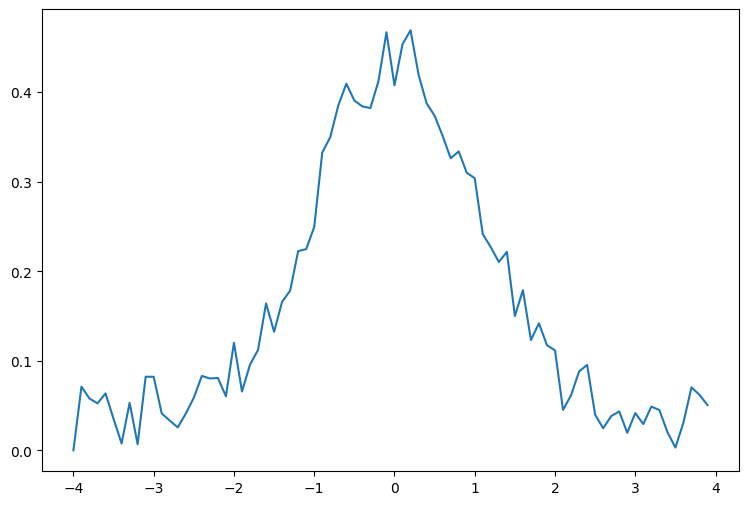

In [5]:
from scipy.stats import norm

#create range of x-values from -4 to 4 in increments of .001
x = np.arange(-4, 4, 0.1)
# x = x.reshape(len(x),1)

#create range of y-values that correspond to normal pdf with mean=0 and sd=1
y = norm.pdf(x,0,1) + np.random.uniform(0,0.08,size=(80))

#define plot
fig, ax = plt.subplots(figsize=(9,6))
ax.plot(x,y)

In [ ]:
def func(x):
    return np.sin(2 * np.pi * x)


size = 25
rng = np.random.RandomState(1234)
x = rng.uniform(0.0, 1.0, size)
y = func(x) + rng.normal(scale=0.1, size=size)
x_test = np.linspace(0.0, 1.0, 100)

In [ ]:
def func(m,c,x):
    return m*x+c

size = 25
rng = np.random.RandomState(1234)
m,c = rng.normal(scale=1, size=2)
x = rng.uniform(0.0, 2, size)
y = func(m,c,x) + rng.normal(scale=0.1, size=size)
x_test = np.linspace(0.0, 2, 100)

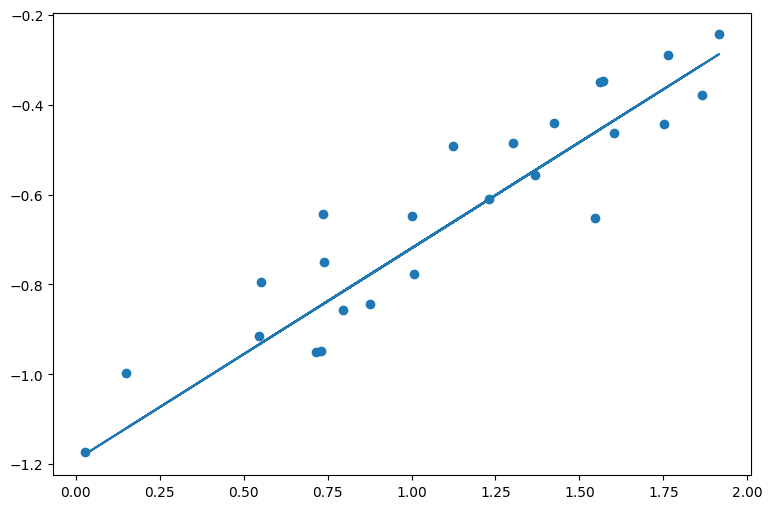

In [ ]:
fig, ax = plt.subplots(figsize=(9,6))
ax.scatter(x,y)
ax.plot(x,func(m,c,x))

### **Diabetes**

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

# Load the diabetes dataset
diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True)

# # Use only one feature
diabetes_X = diabetes_X[:,:4]

# Split the data into training/testing sets
X_train = diabetes_X[:-20]
X_test = diabetes_X[-20:]

# Split the targets into training/testing sets
y_train = diabetes_y[:-20]
y_test = diabetes_y[-20:]

# **Regression**

## **Quantum Kernel-Based Regression**

In [ ]:
n_qubits = 1 # each feature is encoded into each qubit

In [ ]:
dev_kernel = qml.device("lightning.qubit", wires=n_qubits)

projector = np.zeros((2**n_qubits, 2**n_qubits))
projector[0, 0] = 1

@qml.qnode(dev_kernel, interface="autograd")
def kernel(x1, x2):
    """The quantum kernel."""
    AngleEmbedding(x1, wires=range(n_qubits))
    qml.adjoint(AngleEmbedding)(x2, wires=range(n_qubits))
    return qml.expval(qml.Hermitian(projector, wires=range(n_qubits)))

In [ ]:
def kernel_matrix(A, B):
    """Compute the matrix whose entries are the kernel
       evaluated on pairwise data from sets A and B."""
    return np.array([[kernel(a, b) for b in B] for a in A])

In [ ]:
krr = KernelRidge(kernel='precomputed')

In [ ]:
krr.fit(kernel_matrix(x,x),y)

KernelRidge(kernel='precomputed')

In [ ]:
X_test = np.linspace(-4, 4, 80)
X_test = X_test.reshape(80,1)

In [ ]:
yhat = krr.predict(kernel_matrix(X_test,x))

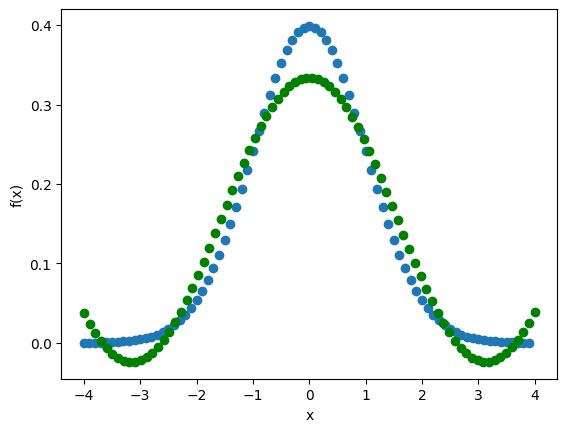

In [ ]:
plt.figure()
plt.scatter(x, y)
plt.scatter(X_test, yhat, color="green")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.tick_params(axis="both", which="major")
plt.tick_params(axis="both", which="minor")
plt.show()

In [ ]:

# The coefficients
# print("Coefficients: \n", krr.coef_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y, yhat))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y, yhat))

# Plot outputs
# for i in range(4):

#   plt.scatter(X_test[:,i], y_test, color="black")
#   plt.plot(X_test[:,i], yhat, color="blue", linewidth=3)

#   plt.xticks(())
#   plt.yticks(())

# plt.show()

Mean squared error: 0.00
Coefficient of determination: 0.95


## **Quantum  Regression**

In [6]:
dev = qml.device("strawberryfields.fock", wires=1, cutoff_dim=10)

In [7]:
def layer(v,n_wires):
    # Matrix multiplication of input layer
    # for i in range(n_wires):
      i=0
      qml.Rotation(v[0], wires=i)
      qml.Squeezing(v[1], 0.0, wires=i)
      qml.Rotation(v[2], wires=i)

      # Bias
      qml.Displacement(v[3], 0.0, wires=i)

      # Element-wise nonlinear transformation
      qml.Kerr(v[4], wires=i)

In [8]:
@qml.qnode(dev)
def quantum_neural_net(var, x,n_wires):
    # Encode input x into quantum state
    # for i in range(n_wires):
    i=0
    qml.Displacement(x, 0.0, wires=i)

    # "layer" subcircuits
    for v in var:
        layer(v,n_wires)

    return [qml.expval(qml.X(i)) for i in range(1)]

In [9]:
np.random.seed(0)
num_layers = 4
var_init = 0.05 * pnp.random.randn(num_layers, 5, requires_grad=True)
print(var_init)

[[ 0.08820262  0.02000786  0.0489369   0.11204466  0.0933779 ]
 [-0.04886389  0.04750442 -0.00756786 -0.00516094  0.02052993]
 [ 0.00720218  0.07271368  0.03805189  0.00608375  0.02219316]
 [ 0.01668372  0.07470395 -0.01025791  0.01565339 -0.04270479]]


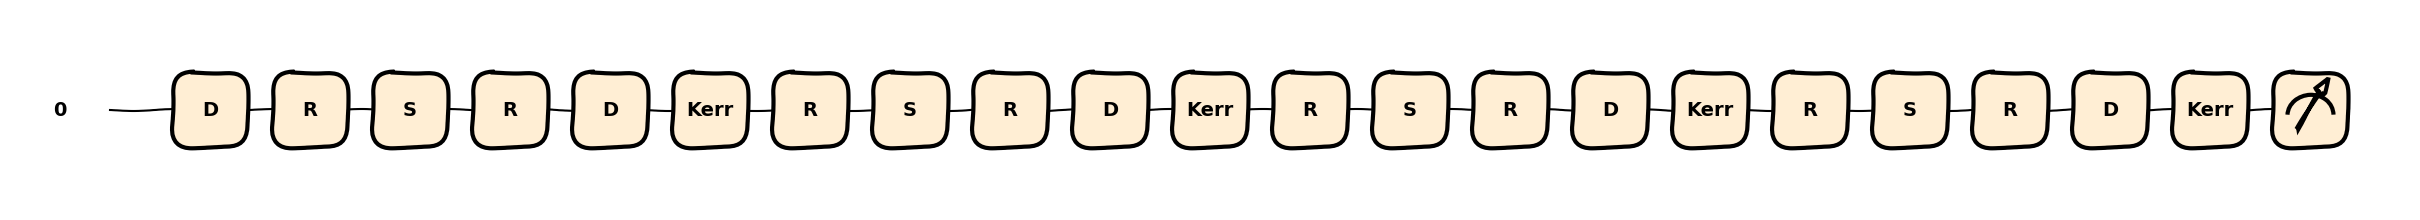

In [10]:
ip =  [var_init,np.random.rand(1,4),4]
fig, ax = qml.draw_mpl(quantum_neural_net,style='sketch',expansion_strategy='device')(*ip)

In [11]:
def square_loss(labels, predictions):
    loss = 0
    for l, p in zip(labels, predictions):
        loss = loss + (l - p) ** 2

    loss = loss / len(labels)
    return loss

In [12]:
def cost(var, features, labels):
    preds = [quantum_neural_net(var, x,1) for x in features]
    return square_loss(labels, preds)

In [17]:
opt = qml.AdamOptimizer(0.01, beta1=0.9, beta2=0.999)

var = var_init
for it in range(80):
    (var, _, _), _cost = opt.step_and_cost(cost, var, x, y)
    # if cost<=0.001:
    #   break
    print("Iter: {:5d} | Cost: {:0.7f} ",(it, _cost))

Iter: {:5d} | Cost: {:0.7f}  (0, tensor([1.61652168], requires_grad=True))
Iter: {:5d} | Cost: {:0.7f}  (1, tensor([0.81666306], requires_grad=True))
Iter: {:5d} | Cost: {:0.7f}  (2, tensor([0.963746], requires_grad=True))
Iter: {:5d} | Cost: {:0.7f}  (3, tensor([0.99284197], requires_grad=True))
Iter: {:5d} | Cost: {:0.7f}  (4, tensor([0.80894725], requires_grad=True))
Iter: {:5d} | Cost: {:0.7f}  (5, tensor([0.5694301], requires_grad=True))
Iter: {:5d} | Cost: {:0.7f}  (6, tensor([0.43584377], requires_grad=True))
Iter: {:5d} | Cost: {:0.7f}  (7, tensor([0.41827322], requires_grad=True))
Iter: {:5d} | Cost: {:0.7f}  (8, tensor([0.42044266], requires_grad=True))
Iter: {:5d} | Cost: {:0.7f}  (9, tensor([0.3879152], requires_grad=True))
Iter: {:5d} | Cost: {:0.7f}  (10, tensor([0.32060629], requires_grad=True))
Iter: {:5d} | Cost: {:0.7f}  (11, tensor([0.23852511], requires_grad=True))
Iter: {:5d} | Cost: {:0.7f}  (12, tensor([0.16338912], requires_grad=True))
Iter: {:5d} | Cost: {:0.7f

In [15]:
var

tensor([[ 0.09820262,  0.01000786,  0.0589369 ,  0.12204452,  0.1033779 ],
        [-0.0388639 ,  0.05750442,  0.00243214,  0.00483905,  0.03052992],
        [ 0.01720218,  0.08271367,  0.04805189,  0.01608374,  0.03219316],
        [ 0.02668372,  0.08470395, -0.00025791,  0.02565338, -0.03270479]], requires_grad=True)

In [18]:
x_pred = np.linspace(-4, 4, 80)
yhat = [quantum_neural_net(var, x_,1) for x_ in x_pred]

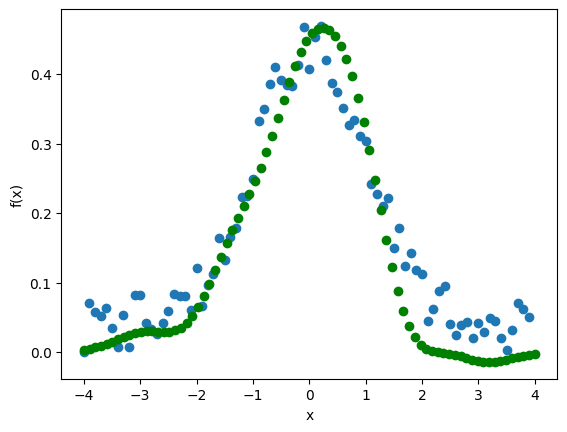

In [19]:
plt.figure()
plt.scatter(x, y)
plt.scatter(x_pred, yhat, color="green")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.tick_params(axis="both", which="major")
plt.tick_params(axis="both", which="minor")
plt.show()

In [20]:
# The coefficients
# print("Coefficients: \n", krr.coef_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y, yhat))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y, yhat))

Mean squared error: 0.00
Coefficient of determination: 0.87


## **Bayesian Regression**

In [6]:
x_test = np.linspace(-4, 4, 80)

In [116]:
n_order = 10
X_train = np.vander(x, n_order + 1, increasing=True)
X_test = np.vander(x_test, n_order + 1, increasing=True)

In [117]:
init = abs(np.random.normal(0,1,size = (1,2)))
init

array([[0.08231223, 1.03390665]])

In [118]:
brr = BayesianRidge(tol=1e-6, fit_intercept=False, compute_score=True, n_iter=100)
# brr.set_params(alpha_init=0.01, lambda_init=0.01)

In [119]:
# brr.fit(x.reshape(25,1), y)
# ymean, ystd = brr.predict(x_test.reshape(100,1), return_std=True)

In [120]:
brr.fit(X_train, y)
ymean, ystd = brr.predict(X_test, return_std=True)

In [121]:
brr.alpha_,brr.lambda_,brr.scores_[-1]

(1817.425225292073, 47.25581742081428, 102.51526517653718)

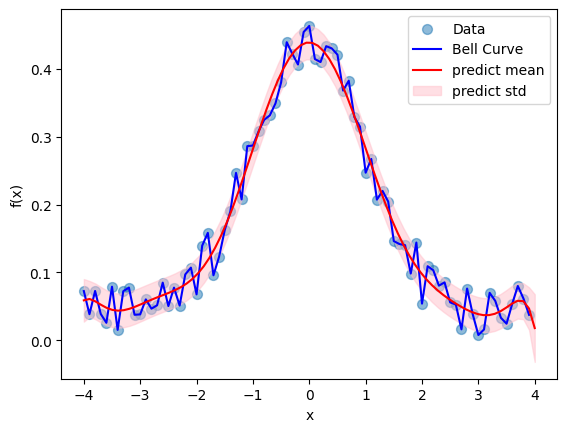

In [124]:
plt.figure()
plt.scatter(x, y,s=50, alpha=0.5,label='Data')
plt.plot(x,y,color="blue",label = 'Bell Curve')
# plt.plot(x_test,func(m,c,x_test),color="blue",label = 'sine Curve')
# plt.scatter(x_test, yhat, color="green")
plt.plot(x_test,ymean, color="red", label="predict mean")
plt.fill_between(
        x_test, ymean - ystd, ymean + ystd, color="pink", alpha=0.5, label="predict std")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.tick_params(axis="both", which="major")
plt.tick_params(axis="both", which="minor")
plt.legend()
plt.show()

In [123]:
# The mean squared error
print("Mean squared error: %.7f" % mean_squared_error(y, ymean))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.4f" % r2_score(y, ymean))

Mean squared error: 0.0005354
Coefficient of determination: 0.9726
